# Lesson 1b: Basic Neural Network with Keras

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [ ]:
%matplotlib inline
from IPython.display import SVG

from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils import model_to_dot # this didn't work
from keras.utils import plot_model # additional
import math
import numpy as np

import matplotlib.pyplot as plt

## Create dataset for the logical XOR function

In [67]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0,
                   1,
                   1,
                   0])

## Build the neural net model

In [68]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid', kernel_initializer='glorot_normal',
                kernel_regularizer=l2(0.0001)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

# Question 1:
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below.

1. There are 6 parameters in the model so far. 2 input, 2 dense, 2 output.
2. output_size * (input_size + 1) == number_parameters; output_size = 2, input_size = 2 in the cell above, and +1 so we get 2*3 = 6
3. The # of parametes is the total number of trainable and non-trainable parameters in each layer, including the hidden layers. The input shape is vector of 2 and the output is vector of 2 as well.



## Add another layer

In [ ]:
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

## Question 2:
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent?

1. 3 parameters were added.
2. When we added another layer, we already had 2 input, 2 dense, 2 output. We don't have to re-add the input layer. Adding a new layer of size 1 (input is implied) will add 3. output = 1 * (input = 2 + 1) = 3

## Visualize the model

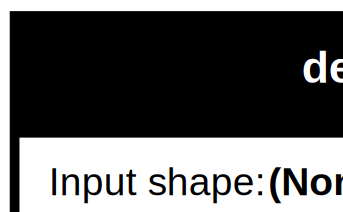

In [ ]:
#dot_img_file = '/tmp/model.png'
#keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Train the model

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [62]:
model.fit(data_X, data_y,
          steps_per_epoch=10,
          epochs=500)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5067 - loss: 0.2047 
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4067 - loss: 0.2047     
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5067 - loss: 0.1999 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 0.1982 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4067 - loss: 0.2173     
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4067 - loss: 0.2142     
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4733 - loss: 0.1981 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3733 - loss: 0.2152     
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3733 - loss: 0.2126     
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 0.2007 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3233 - loss: 0.2198     
Epoch 12/500
10/10 ━━━━━━━━━

# Run the trained model on the dataset.

In [65]:
model.predict(data_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.4883712 ],
       [0.65168536],
       [0.42700174],
       [0.44860786]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The highest I could get this model was close to 73.50% accuracy with the above parameters. I tried multiple high and low values for each parameter, and even included batch size.

The predictions did not turn out too well based on the X_data, but in line with the last iteration of the model with the 73.50% accuracy. Assuming a hidden layer threshold is 0.5 the 1st, 2nd, and 4th prediction would make sense and be close to 73.50% accurate.

Granted I'm not sure if that's what's happening here. Perhaps if I had a better setup I could run this model to a higher accuracy and get more concrete predictions.

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [66]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 2.4141238 ,  0.2021949 ],
       [-3.5428317 , -0.46481523]], dtype=float32), array([-1.5614778, -0.6501436], dtype=float32)]
[array([[1.2380126 ],
       [0.42002642]], dtype=float32), array([-0.40528902], dtype=float32)]


# Analysis

The network structure is pretty simple. We add some hidden weights in the middle so it might be useful to explore those, as we can see above when evaluating our model. Since this is a sequential model for XOR, we would like a higher accuracy, but I could not get it with my current epochs and iterations.

In [69]:
%%shell

jupyter nbconvert --to html /content/Lab01b.ipynb

[NbConvertApp] Converting notebook /content/Lab01b.ipynb to html
[NbConvertApp] Writing 700668 bytes to /content/Lab01b.html
